In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [63]:
standard_ra_no_ss = pd.read_csv("data/output.aux", index_col=0)
standard_ra_no_ss.head()

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_35560/2065120000.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  standard_ra_no_ss = pd.read_csv("data/output.aux", index_col=0)


,type,year,pa_weight,rec_weight,fit_weight,fit_lag_duration,fit_peak_value,fit_peak_duration,alpha,in_degree,out_degree,assigned_out_degree,planted_nodes_line_number,generator_node_string
node_id,,,,,,,,,,,,,,
35,seed,1982,-1.0,-1.0,-1.0,0,1,1000,-1.0,3,1,-1,-1,no_generators
76,seed,1975,-1.0,-1.0,-1.0,0,3,1000,-1.0,435,2,-1,-1,no_generators
79,seed,1977,-1.0,-1.0,-1.0,0,34,1000,-1.0,125,1,-1,-1,no_generators
247,seed,1981,-1.0,-1.0,-1.0,0,3,1000,-1.0,42,1,-1,-1,no_generators
258,seed,1969,-1.0,-1.0,-1.0,0,1,1000,-1.0,176,2,-1,-1,no_generators


In [64]:
f1 = standard_ra_no_ss.query("fit_peak_value > 0 and fit_peak_value <= 10")
f2 = standard_ra_no_ss.query("fit_peak_value > 10 and fit_peak_value <= 100")
f3 = standard_ra_no_ss.query("fit_peak_value > 100 and fit_peak_value <= 1000")
f4 = standard_ra_no_ss.query("fit_peak_value > 1000 and fit_peak_value <= 10000")
f5 = standard_ra_no_ss.query("fit_peak_value > 10000 and fit_peak_value <= 100000")
f6 = standard_ra_no_ss.query("fit_peak_value > 100000 and fit_peak_value <= 1000000")

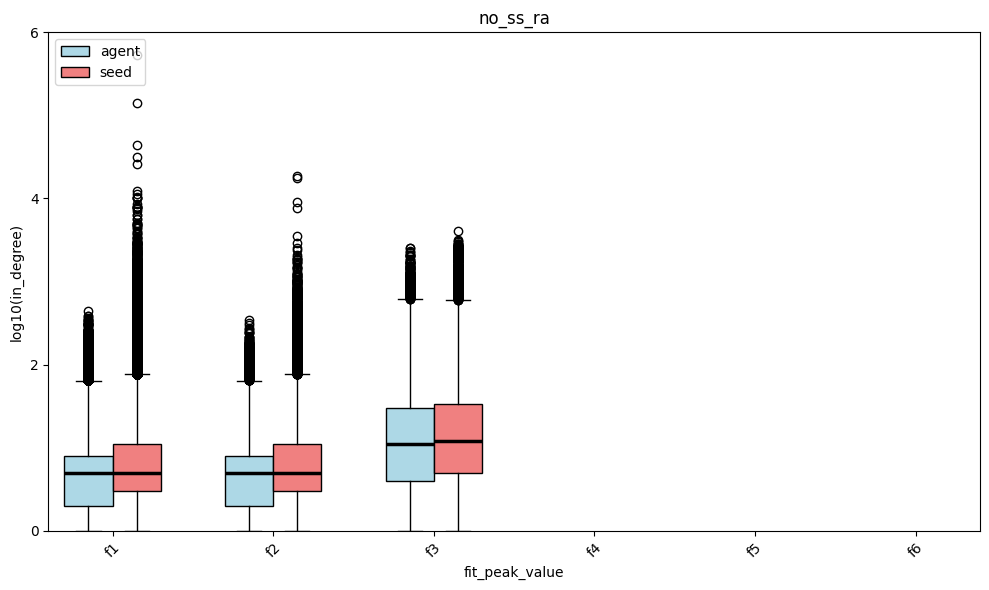

In [65]:
dfs    = [f1, f2, f3, f4, f5, f6]
labels = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']

positions = np.arange(len(dfs)) * 2
width     = 0.6

fig, ax = plt.subplots(figsize=(10, 6))
medianprops = dict(color='black', linewidth=2.5)

for i, df in enumerate(dfs):
    x = positions[i]

    agent_vals = df.loc[df['type']=='agent', 'in_degree']
    seed_vals  = df.loc[df['type']=='seed',  'in_degree']

    agent_vals = agent_vals[agent_vals > 0]
    seed_vals  = seed_vals[seed_vals > 0]

    agent_vals = np.log10(agent_vals)
    seed_vals  = np.log10(seed_vals)
    ax.boxplot(
        agent_vals,
        positions=[x - width/2],
        widths=width,
        notch=False,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue',  edgecolor='black'),
        medianprops=medianprops
    )

    ax.boxplot(
        seed_vals,
        positions=[x + width/2],
        widths=width,
        notch=False,
        patch_artist=True,
        boxprops=dict(facecolor='lightcoral', edgecolor='black'),
        medianprops=medianprops
    )

ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('fit_peak_value')

ax.set_ylabel('log10(in_degree)')
ax.set_yticks([0, 2, 4, 6])
ax.set_ylim(0, 6)

ax.set_title('no_ss_ra')
legend_elems = [
    Patch(facecolor='lightblue',  edgecolor='black', label='agent'),
    Patch(facecolor='lightcoral', edgecolor='black', label='seed')
]
ax.legend(handles=legend_elems, loc='upper left')
plt.tight_layout()
plt.show()